# Creating the dataset vaccine-batches

The vaccine-batches dataset source is Brazilian government [SAGE department webpage](https://sage.saude.gov.br/sistemas/vacina/vacina_fases.php) ("Strategic Management Office", in a free translation) listing transport invoices. The invoices refer to freights of COVID-19 vaccine batches from the Federal government to its States. The invoice files can be downloaded in PDF form.

## Step 1. Extracting the PDF files URLs

The URL scrapping was not automatic. After pulling the HTML source for the page, we can see all 590 PDF files (from January to May 2021) are listed in HTML tables:

![HTML code snippet showing tables, td and tr elements containing PDF links](https://raw.githubusercontent.com/mirianbr/vaccine-batches/main/assets/sage-html.png)

I have used the formatting class `fa-file-pdf` to quickly identify all URLs, using [the Find > Mark menu option in Notepad++](https://stackoverflow.com/questions/21164518/find-lines-not-starting-with-in-notepad/48979734#48979734). 
Here's the [complete PDF files URL list in CSV format](https://github.com/mirianbr/vaccine-batches/blob/main/csv/urls.csv).

## Step 2. Downloading the PDF files

In order to download the PDF files locally, I'm using Python's standard `csv` to load the URLs from the CSV file, and `urllib` to get the PDF files. The files are saved using the original PDF names.

In [21]:
import csv

from datetime import datetime
from urllib import request

now = datetime.now()
print("Starting: ", now)

with open('urls.csv', 'r', encoding='utf-8') as url_file:
    reader = csv.reader(url_file, delimiter=',')
    for row in reader:
        url = row[0]
        full_pdf_url='https://sage.saude.gov.br/sistemas/vacina/'+url
        last_char_name=url.find('?')
        local_pdf_filename="pdf/"+url[4:last_char_name]
        
        try:
            request.urlretrieve(full_pdf_url, local_pdf_filename)
            print("Downloading: ", url, full_pdf_url, local_pdf_filename)
        except Exception:
            print ("*** ERROR: ", url, full_pdf_url, local_pdf_filename)

now = datetime.now()
print("Finished: ", now)

Starting:  2021-07-13 20:40:00.854574
Downloading:  pdf/ac_fase1.pdf?n=1124368608 https://sage.saude.gov.br/sistemas/vacina/pdf/ac_fase1.pdf?n=1124368608 pdf/ac_fase1.pdf
Downloading:  pdf/ac_fase2.pdf?n=464034710 https://sage.saude.gov.br/sistemas/vacina/pdf/ac_fase2.pdf?n=464034710 pdf/ac_fase2.pdf
Downloading:  pdf/ac_fase3.pdf?n=419862735 https://sage.saude.gov.br/sistemas/vacina/pdf/ac_fase3.pdf?n=419862735 pdf/ac_fase3.pdf
Downloading:  pdf/ac_fase4.pdf?n=807395820 https://sage.saude.gov.br/sistemas/vacina/pdf/ac_fase4.pdf?n=807395820 pdf/ac_fase4.pdf
Downloading:  pdf/ac_fase5.pdf?n=1841214851 https://sage.saude.gov.br/sistemas/vacina/pdf/ac_fase5.pdf?n=1841214851 pdf/ac_fase5.pdf
Downloading:  pdf/ac_fase6.pdf?n=1967422654 https://sage.saude.gov.br/sistemas/vacina/pdf/ac_fase6.pdf?n=1967422654 pdf/ac_fase6.pdf
Downloading:  pdf/ac_fase7.pdf?n=20595647 https://sage.saude.gov.br/sistemas/vacina/pdf/ac_fase7.pdf?n=20595647 pdf/ac_fase7.pdf
Downloading:  pdf/ac_fase8.pdf?n=10014080

Downloading:  pdf/ap_fase19.pdf?n=1473231465 https://sage.saude.gov.br/sistemas/vacina/pdf/ap_fase19.pdf?n=1473231465 pdf/ap_fase19.pdf
Downloading:  pdf/ap_fase20.pdf?n=1641386295 https://sage.saude.gov.br/sistemas/vacina/pdf/ap_fase20.pdf?n=1641386295 pdf/ap_fase20.pdf
Downloading:  pdf/ap_fase21.pdf?n=837945256 https://sage.saude.gov.br/sistemas/vacina/pdf/ap_fase21.pdf?n=837945256 pdf/ap_fase21.pdf
Downloading:  pdf/ap_fase22.pdf?n=1803878857 https://sage.saude.gov.br/sistemas/vacina/pdf/ap_fase22.pdf?n=1803878857 pdf/ap_fase22.pdf
Downloading:  pdf/am_fase1.pdf?n=2010420738 https://sage.saude.gov.br/sistemas/vacina/pdf/am_fase1.pdf?n=2010420738 pdf/am_fase1.pdf
Downloading:  pdf/am_fase2.pdf?n=1478082774 https://sage.saude.gov.br/sistemas/vacina/pdf/am_fase2.pdf?n=1478082774 pdf/am_fase2.pdf
Downloading:  pdf/am_fase3.pdf?n=7638249 https://sage.saude.gov.br/sistemas/vacina/pdf/am_fase3.pdf?n=7638249 pdf/am_fase3.pdf
Downloading:  pdf/am_fase4.pdf?n=1233379606 https://sage.saude.go

Downloading:  pdf/ce_fase15.pdf?n=1069459017 https://sage.saude.gov.br/sistemas/vacina/pdf/ce_fase15.pdf?n=1069459017 pdf/ce_fase15.pdf
Downloading:  pdf/ce_fase16.pdf?n=159056889 https://sage.saude.gov.br/sistemas/vacina/pdf/ce_fase16.pdf?n=159056889 pdf/ce_fase16.pdf
Downloading:  pdf/ce_fase17.pdf?n=1981622510 https://sage.saude.gov.br/sistemas/vacina/pdf/ce_fase17.pdf?n=1981622510 pdf/ce_fase17.pdf
Downloading:  pdf/ce_fase18.pdf?n=488158596 https://sage.saude.gov.br/sistemas/vacina/pdf/ce_fase18.pdf?n=488158596 pdf/ce_fase18.pdf
Downloading:  pdf/ce_fase19.pdf?n=1770166527 https://sage.saude.gov.br/sistemas/vacina/pdf/ce_fase19.pdf?n=1770166527 pdf/ce_fase19.pdf
Downloading:  pdf/ce_fase20.pdf?n=532373461 https://sage.saude.gov.br/sistemas/vacina/pdf/ce_fase20.pdf?n=532373461 pdf/ce_fase20.pdf
Downloading:  pdf/ce_fase21.pdf?n=2061980072 https://sage.saude.gov.br/sistemas/vacina/pdf/ce_fase21.pdf?n=2061980072 pdf/ce_fase21.pdf
Downloading:  pdf/ce_fase22.pdf?n=319688475 https://sa

Downloading:  pdf/go_fase11.pdf?n=1557979684 https://sage.saude.gov.br/sistemas/vacina/pdf/go_fase11.pdf?n=1557979684 pdf/go_fase11.pdf
Downloading:  pdf/go_fase12.pdf?n=930357131 https://sage.saude.gov.br/sistemas/vacina/pdf/go_fase12.pdf?n=930357131 pdf/go_fase12.pdf
Downloading:  pdf/go_fase13.pdf?n=534097254 https://sage.saude.gov.br/sistemas/vacina/pdf/go_fase13.pdf?n=534097254 pdf/go_fase13.pdf
Downloading:  pdf/go_fase14.pdf?n=1706138383 https://sage.saude.gov.br/sistemas/vacina/pdf/go_fase14.pdf?n=1706138383 pdf/go_fase14.pdf
Downloading:  pdf/go_fase15.pdf?n=1190632655 https://sage.saude.gov.br/sistemas/vacina/pdf/go_fase15.pdf?n=1190632655 pdf/go_fase15.pdf
Downloading:  pdf/go_fase16.pdf?n=646926357 https://sage.saude.gov.br/sistemas/vacina/pdf/go_fase16.pdf?n=646926357 pdf/go_fase16.pdf
Downloading:  pdf/go_fase17.pdf?n=1768793506 https://sage.saude.gov.br/sistemas/vacina/pdf/go_fase17.pdf?n=1768793506 pdf/go_fase17.pdf
Downloading:  pdf/go_fase18.pdf?n=1770596653 https://s

Downloading:  pdf/ms_fase7.pdf?n=502116140 https://sage.saude.gov.br/sistemas/vacina/pdf/ms_fase7.pdf?n=502116140 pdf/ms_fase7.pdf
Downloading:  pdf/ms_fase8.pdf?n=213033279 https://sage.saude.gov.br/sistemas/vacina/pdf/ms_fase8.pdf?n=213033279 pdf/ms_fase8.pdf
Downloading:  pdf/ms_fase9.pdf?n=661139238 https://sage.saude.gov.br/sistemas/vacina/pdf/ms_fase9.pdf?n=661139238 pdf/ms_fase9.pdf
Downloading:  pdf/ms_fase10.pdf?n=252378444 https://sage.saude.gov.br/sistemas/vacina/pdf/ms_fase10.pdf?n=252378444 pdf/ms_fase10.pdf
Downloading:  pdf/ms_fase11.pdf?n=1163512869 https://sage.saude.gov.br/sistemas/vacina/pdf/ms_fase11.pdf?n=1163512869 pdf/ms_fase11.pdf
Downloading:  pdf/ms_fase12.pdf?n=114936540 https://sage.saude.gov.br/sistemas/vacina/pdf/ms_fase12.pdf?n=114936540 pdf/ms_fase12.pdf
Downloading:  pdf/ms_fase13.pdf?n=1771434254 https://sage.saude.gov.br/sistemas/vacina/pdf/ms_fase13.pdf?n=1771434254 pdf/ms_fase13.pdf
Downloading:  pdf/ms_fase14.pdf?n=1737105464 https://sage.saude.gov

Downloading:  pdf/pb_fase3.pdf?n=331772293 https://sage.saude.gov.br/sistemas/vacina/pdf/pb_fase3.pdf?n=331772293 pdf/pb_fase3.pdf
Downloading:  pdf/pb_fase4.pdf?n=816856770 https://sage.saude.gov.br/sistemas/vacina/pdf/pb_fase4.pdf?n=816856770 pdf/pb_fase4.pdf
Downloading:  pdf/pb_fase5.pdf?n=540994030 https://sage.saude.gov.br/sistemas/vacina/pdf/pb_fase5.pdf?n=540994030 pdf/pb_fase5.pdf
Downloading:  pdf/pb_fase6.pdf?n=1849250277 https://sage.saude.gov.br/sistemas/vacina/pdf/pb_fase6.pdf?n=1849250277 pdf/pb_fase6.pdf
Downloading:  pdf/pb_fase7.pdf?n=1566837525 https://sage.saude.gov.br/sistemas/vacina/pdf/pb_fase7.pdf?n=1566837525 pdf/pb_fase7.pdf
Downloading:  pdf/pb_fase8.pdf?n=2121506409 https://sage.saude.gov.br/sistemas/vacina/pdf/pb_fase8.pdf?n=2121506409 pdf/pb_fase8.pdf
Downloading:  pdf/pb_fase9.pdf?n=843195220 https://sage.saude.gov.br/sistemas/vacina/pdf/pb_fase9.pdf?n=843195220 pdf/pb_fase9.pdf
Downloading:  pdf/pb_fase10.pdf?n=1906440097 https://sage.saude.gov.br/sistem

Downloading:  pdf/pe_fase21.pdf?n=874907223 https://sage.saude.gov.br/sistemas/vacina/pdf/pe_fase21.pdf?n=874907223 pdf/pe_fase21.pdf
Downloading:  pdf/pe_fase22.pdf?n=483320352 https://sage.saude.gov.br/sistemas/vacina/pdf/pe_fase22.pdf?n=483320352 pdf/pe_fase22.pdf
Downloading:  pdf/pi_fase1.pdf?n=3030887 https://sage.saude.gov.br/sistemas/vacina/pdf/pi_fase1.pdf?n=3030887 pdf/pi_fase1.pdf
Downloading:  pdf/pi_fase2.pdf?n=1933876914 https://sage.saude.gov.br/sistemas/vacina/pdf/pi_fase2.pdf?n=1933876914 pdf/pi_fase2.pdf
Downloading:  pdf/pi_fase3.pdf?n=1016691956 https://sage.saude.gov.br/sistemas/vacina/pdf/pi_fase3.pdf?n=1016691956 pdf/pi_fase3.pdf
Downloading:  pdf/pi_fase4.pdf?n=1228974826 https://sage.saude.gov.br/sistemas/vacina/pdf/pi_fase4.pdf?n=1228974826 pdf/pi_fase4.pdf
Downloading:  pdf/pi_fase5.pdf?n=1688558177 https://sage.saude.gov.br/sistemas/vacina/pdf/pi_fase5.pdf?n=1688558177 pdf/pi_fase5.pdf
Downloading:  pdf/pi_fase6.pdf?n=1309020009 https://sage.saude.gov.br/sis

Downloading:  pdf/rn_fase17.pdf?n=1870277411 https://sage.saude.gov.br/sistemas/vacina/pdf/rn_fase17.pdf?n=1870277411 pdf/rn_fase17.pdf
Downloading:  pdf/rn_fase18.pdf?n=503700418 https://sage.saude.gov.br/sistemas/vacina/pdf/rn_fase18.pdf?n=503700418 pdf/rn_fase18.pdf
Downloading:  pdf/rn_fase19.pdf?n=884375171 https://sage.saude.gov.br/sistemas/vacina/pdf/rn_fase19.pdf?n=884375171 pdf/rn_fase19.pdf
Downloading:  pdf/rn_fase20.pdf?n=1967382098 https://sage.saude.gov.br/sistemas/vacina/pdf/rn_fase20.pdf?n=1967382098 pdf/rn_fase20.pdf
Downloading:  pdf/rn_fase21.pdf?n=1582984137 https://sage.saude.gov.br/sistemas/vacina/pdf/rn_fase21.pdf?n=1582984137 pdf/rn_fase21.pdf
Downloading:  pdf/rn_fase22.pdf?n=135086725 https://sage.saude.gov.br/sistemas/vacina/pdf/rn_fase22.pdf?n=135086725 pdf/rn_fase22.pdf
Downloading:  pdf/rs_fase1.pdf?n=1605561314 https://sage.saude.gov.br/sistemas/vacina/pdf/rs_fase1.pdf?n=1605561314 pdf/rs_fase1.pdf
Downloading:  pdf/rs_fase2.pdf?n=1823804216 https://sage.

Downloading:  pdf/rr_fase13.pdf?n=727097231 https://sage.saude.gov.br/sistemas/vacina/pdf/rr_fase13.pdf?n=727097231 pdf/rr_fase13.pdf
Downloading:  pdf/rr_fase14.pdf?n=518695997 https://sage.saude.gov.br/sistemas/vacina/pdf/rr_fase14.pdf?n=518695997 pdf/rr_fase14.pdf
Downloading:  pdf/rr_fase15.pdf?n=757346320 https://sage.saude.gov.br/sistemas/vacina/pdf/rr_fase15.pdf?n=757346320 pdf/rr_fase15.pdf
Downloading:  pdf/rr_fase16.pdf?n=1145079962 https://sage.saude.gov.br/sistemas/vacina/pdf/rr_fase16.pdf?n=1145079962 pdf/rr_fase16.pdf
Downloading:  pdf/rr_fase17.pdf?n=1631418990 https://sage.saude.gov.br/sistemas/vacina/pdf/rr_fase17.pdf?n=1631418990 pdf/rr_fase17.pdf
Downloading:  pdf/rr_fase18.pdf?n=954287661 https://sage.saude.gov.br/sistemas/vacina/pdf/rr_fase18.pdf?n=954287661 pdf/rr_fase18.pdf
Downloading:  pdf/rr_fase19.pdf?n=1021140360 https://sage.saude.gov.br/sistemas/vacina/pdf/rr_fase19.pdf?n=1021140360 pdf/rr_fase19.pdf
Downloading:  pdf/rr_fase20.pdf?n=272978903 https://sage

Downloading:  pdf/se_fase13.pdf?n=106415154 https://sage.saude.gov.br/sistemas/vacina/pdf/se_fase13.pdf?n=106415154 pdf/se_fase13.pdf
Downloading:  pdf/se_fase14.pdf?n=1950202899 https://sage.saude.gov.br/sistemas/vacina/pdf/se_fase14.pdf?n=1950202899 pdf/se_fase14.pdf
Downloading:  pdf/se_fase15.pdf?n=2104414508 https://sage.saude.gov.br/sistemas/vacina/pdf/se_fase15.pdf?n=2104414508 pdf/se_fase15.pdf
Downloading:  pdf/se_fase16.pdf?n=63479182 https://sage.saude.gov.br/sistemas/vacina/pdf/se_fase16.pdf?n=63479182 pdf/se_fase16.pdf
Downloading:  pdf/se_fase17.pdf?n=1090846989 https://sage.saude.gov.br/sistemas/vacina/pdf/se_fase17.pdf?n=1090846989 pdf/se_fase17.pdf
Downloading:  pdf/se_fase18.pdf?n=309416896 https://sage.saude.gov.br/sistemas/vacina/pdf/se_fase18.pdf?n=309416896 pdf/se_fase18.pdf
Downloading:  pdf/se_fase19.pdf?n=1041683569 https://sage.saude.gov.br/sistemas/vacina/pdf/se_fase19.pdf?n=1041683569 pdf/se_fase19.pdf
Downloading:  pdf/se_fase20.pdf?n=504469982 https://sage

Two URLs errored out:
* https://sage.saude.gov.br/sistemas/vacina/pdf/pb_fase22.pdf?n=1508886842
* https://sage.saude.gov.br/sistemas/vacina/pdf/rj_fase13.pdf?n=1398195202

A total of 588 PDF files were successfully downloaded.

## Step 3. Converting the PDF to images to prepare for OCR

For tesseract to run, I need to have the PDF files converted to images. 

After playing with imagemagick and converting some of the files to test the outputs, I opted for the following parameters for `convert`: `-quality 100 -density 300 -depth 8 -background white` (inspired in [this tutorial](https://escoladedados.org/tutoriais/usando-ocr-em-dados-e-tabelas-de-pdfs/), Portuguese only).

I'm running the conversion directly in the command line, using Python's `os.system`.

In [12]:
import os

from datetime import datetime

now = datetime.now()
print("Starting: ", now)

pdf_list = os.listdir('pdf/')

for pdf_file in pdf_list:
    pdf_filename = 'pdf/'+pdf_file
    png_filename = 'img/'+pdf_file[0:-4]+'.png'
    command = 'convert -quality 100 -density 300 -depth 8 -background white {} {}'.format(pdf_filename, png_filename)
    os.system(command)
    print ("Running: ", command)

now = datetime.now()
print("Finished: ", now)

Starting:  2021-07-14 09:59:13.507034
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ac_fase1.pdf img/ac_fase1.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ac_fase10.pdf img/ac_fase10.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ac_fase11.pdf img/ac_fase11.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ac_fase12.pdf img/ac_fase12.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ac_fase13.pdf img/ac_fase13.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ac_fase14.pdf img/ac_fase14.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ac_fase15.pdf img/ac_fase15.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ac_fase16.pdf img/ac_fase16.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ac_fase17.pdf img/ac_fase17.png
R

Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ap_fase2.pdf img/ap_fase2.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ap_fase20.pdf img/ap_fase20.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ap_fase21.pdf img/ap_fase21.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ap_fase22.pdf img/ap_fase22.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ap_fase3.pdf img/ap_fase3.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ap_fase4.pdf img/ap_fase4.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ap_fase5.pdf img/ap_fase5.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ap_fase6.pdf img/ap_fase6.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/ap_fase7.pdf img/ap_fase7.png
Running:  convert -quality 100 -density 300 -dept

Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/es_fase10.pdf img/es_fase10.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/es_fase11.pdf img/es_fase11.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/es_fase12.pdf img/es_fase12.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/es_fase13.pdf img/es_fase13.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/es_fase14.pdf img/es_fase14.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/es_fase15.pdf img/es_fase15.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/es_fase16.pdf img/es_fase16.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/es_fase17.pdf img/es_fase17.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/es_fase18.pdf img/es_fase18.png
Running:  convert -quality 100 -densi

Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/mg_fase21.pdf img/mg_fase21.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/mg_fase22.pdf img/mg_fase22.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/mg_fase3.pdf img/mg_fase3.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/mg_fase4.pdf img/mg_fase4.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/mg_fase5.pdf img/mg_fase5.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/mg_fase6.pdf img/mg_fase6.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/mg_fase7.pdf img/mg_fase7.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/mg_fase8.pdf img/mg_fase8.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/mg_fase9.pdf img/mg_fase9.png
Running:  convert -quality 100 -density 300 -depth 

Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pb_fase12.pdf img/pb_fase12.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pb_fase13.pdf img/pb_fase13.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pb_fase14.pdf img/pb_fase14.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pb_fase15.pdf img/pb_fase15.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pb_fase16.pdf img/pb_fase16.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pb_fase17.pdf img/pb_fase17.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pb_fase18.pdf img/pb_fase18.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pb_fase19.pdf img/pb_fase19.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pb_fase2.pdf img/pb_fase2.png
Running:  convert -quality 100 -density

Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pr_fase4.pdf img/pr_fase4.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pr_fase5.pdf img/pr_fase5.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pr_fase6.pdf img/pr_fase6.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pr_fase7.pdf img/pr_fase7.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pr_fase8.pdf img/pr_fase8.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/pr_fase9.pdf img/pr_fase9.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rj_fase1.pdf img/rj_fase1.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rj_fase10.pdf img/rj_fase10.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rj_fase11.pdf img/rj_fase11.png
Running:  convert -quality 100 -density 300 -depth 

Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rr_fase16.pdf img/rr_fase16.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rr_fase17.pdf img/rr_fase17.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rr_fase18.pdf img/rr_fase18.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rr_fase19.pdf img/rr_fase19.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rr_fase2.pdf img/rr_fase2.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rr_fase20.pdf img/rr_fase20.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rr_fase21.pdf img/rr_fase21.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rr_fase22.pdf img/rr_fase22.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/rr_fase3.pdf img/rr_fase3.png
Running:  convert -quality 100 -density 3

Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/se_fase7.pdf img/se_fase7.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/se_fase8.pdf img/se_fase8.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/se_fase9.pdf img/se_fase9.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/sp_fase10.pdf img/sp_fase10.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/sp_fase11.pdf img/sp_fase11.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/sp_fase12.pdf img/sp_fase12.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/sp_fase13.pdf img/sp_fase13.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/sp_fase14.pdf img/sp_fase14.png
Running:  convert -quality 100 -density 300 -depth 8 -background white pdf/sp_fase15.pdf img/sp_fase15.png
Running:  convert -quality 100 -density 300

### Step 3.1. Checking the image files generated

Each PDF file generated several image files, one image per page. Most generated 2-4 pages, but some of the files had up to 9 pages (one having 14 pages).

How many pages? [2, 4, 3, 5, 6, 9, 11, 14]
How many documents with this amount of pages? [308, 266, 2, 8, 1, 1, 1, 1]


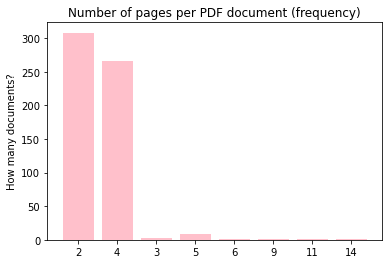

Files with unusual number of pages, for manual review: ['pi_fase21.pdf', 'pr_fase17.pdf', 'rj_fase1.pdf', 'rj_fase10.pdf', 'rj_fase12.pdf', 'rj_fase4.pdf', 'rj_fase5.pdf', 'rj_fase7.pdf', 'rj_fase8.pdf', 'rj_fase9.pdf', 'sp_fase13.pdf', 'sp_fase15.pdf', 'sp_fase17.pdf', 'sp_fase21.pdf']


In [80]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

pdf_list = os.listdir('pdf/')
img_list_sizes = {}
img_list_sizes_rev = {}

for pdf_file in pdf_list:
    img_list = glob.glob('img/'+pdf_file[:-4]+'-*.png')
    img_list_sizes[pdf_file] = len(img_list)
    nr_pages = len(img_list)
    if (nr_pages in img_list_sizes_rev.keys()):
        img_list_sizes_rev[nr_pages] = img_list_sizes_rev[nr_pages] + 1
    else:
        img_list_sizes_rev[nr_pages] = 1    

print ("How many pages?", list(img_list_sizes_rev.keys()))
print ("How many documents with this amount of pages?", list(img_list_sizes_rev.values()))

y = np.arange(len(img_list_sizes_rev.keys()))
plt.bar(y, img_list_sizes_rev.values(), align='center', color='pink')
plt.xticks(y, img_list_sizes_rev.keys())

plt.ylabel('How many documents?')
plt.title('Number of pages per PDF document (frequency)')

plt.show();

print ("Files with unusual number of pages, for manual review:", 
       [filename for (filename, nr_pages) in img_list_sizes.items() 
        if nr_pages not in (2, 4)])

Now checking the images files size, to check if none are zero-ed.

In [106]:
import os

img_list = os.listdir('img/')
sizes_list = [round(os.path.getsize('img/'+img)/1024,2) for img in img_list]

sizes_list.sort()
print ("Image files in KB:", sizes_list)

Image files in KB: [5.07, 14.48, 45.07, 45.63, 51.9, 55.62, 57.77, 65.12, 67.28, 77.41, 82.63, 104.96, 176.35, 178.38, 180.34, 184.57, 187.54, 188.1, 188.21, 189.16, 201.52, 213.44, 221.6, 331.39, 342.22, 342.53, 344.54, 349.96, 353.06, 360.3, 363.78, 366.71, 376.55, 379.54, 380.01, 384.26, 391.13, 401.9, 402.32, 408.93, 415.45, 421.07, 442.73, 455.95, 461.86, 464.63, 468.64, 469.24, 479.28, 481.3, 482.21, 485.41, 491.98, 497.13, 500.08, 502.07, 506.16, 514.34, 518.46, 524.7, 532.45, 533.07, 533.38, 536.97, 539.07, 539.47, 539.92, 542.63, 545.03, 551.56, 555.17, 555.4, 555.92, 559.76, 564.13, 568.53, 571.67, 573.95, 585.55, 589.13, 591.79, 595.61, 602.02, 605.16, 609.66, 617.94, 621.63, 622.79, 623.83, 626.08, 629.94, 631.47, 633.15, 633.39, 635.04, 635.91, 636.32, 638.02, 644.13, 645.78, 662.91, 672.95, 675.2, 678.45, 681.72, 682.1, 688.96, 692.4, 695.59, 698.81, 700.95, 701.63, 704.09, 710.0, 710.34, 710.42, 713.86, 715.08, 721.22, 722.01, 725.19, 725.24, 731.55, 732.87, 734.03, 736.

Turns out the two smalles files are indeed broken - `ap_fase10-3.png`, `ap_fase21-1.png`. 
I tried forcing just the two image sets to be re-generated again, and using the tiff format, and removing transparencies (`-alpha off`), but all with the same results. 

The PDF files open in Adobe Acrobat under Windows 10 normally, though. Generating the images manually worked fine, using screen capture under Windows.

## Step 4. Which fields really matter? Deciding on what will constitute the dataset

Taking a step back, I decided to explore the PDF files themselves a little further, to decide which exact fields will constitute the vaccine batches dataset. Here follows a list of fields of potential interest:

```
HEADER
numero_pedido (order number)
data_pedido (order date)
data_autorizacao (authorization date)
unidade_destino (ship-to state)
descricao_localidade (ship-to description)
cidade (city)
telefone (telephone number)

SUBTOTAL
codigo (code)
descricao (description)
qtd_autorizado (authorized quantity)
qtd_entregue (delivered quantity)
vl_unitario (unit price)
vl_total (total amount)

ITEMS
fornecedor (supplier)
fabricante (manufacturer)
endereco (origin address)
qtd_recolher (quantity to be collected)
data_validade (expiration date)
lote (batch number)
```

The most important are the vaccines batches information, where they were sent to and when:

```
HEADER
data_pedido (order date)
unidade_destino (ship-to state)

ITEMS
fornecedor (supplier)
fabricante (manufacturer)
data_validade (expiration date)
lote (batch number)
```

## Step 5. OCR-ing images

Now, time for actually OCR-ing the image files and getting the data from them. 

In the code snippet below I'm looping through the images folder, generating one text file per original PDF file (comprising all pages in one single text file). The pages in each file are semantically related - all of them referring to a specific transport event for a Brazilian Federal State -, so it makes sense to have all the data concerning each of the transport events in one text file.

In [12]:
import os
import pytesseract as ocr

from datetime import datetime
from PIL import Image

ocr.pytesseract.tesseract_cmd = r'C:\Users\miria\anaconda3\envs\tesseract\Library\bin\tesseract.exe'
tessdata_dir_config = r'--tessdata-dir "C:\Users\miria\anaconda3\envs\tesseract\Library\bin\tessdata"'

now = datetime.now()
print ('Starting:', now)

img_list = os.listdir('img/')

for img in img_list:
    rootname_img = img[:img.find('-')]
    page = img[img.find('-')+1:img.find('.')]
    txt_filename = 'txt/'+rootname_img+'.txt'
    content = ocr.image_to_string(Image.open('img/'+img), lang='por', config=tessdata_dir_config)
    
    with open(txt_filename, 'a+') as txt_file:
        txt_file.write(content)
        try:
            page = int(page)+1
        except ValueError:
            page = 'unknown'
        print ('Writing:', txt_filename, '- page', page)

now = datetime.now()
print ('Finished:', now)

Starting: 2021-07-20 11:48:34.763468
Writing: txt/ac_fase1.txt - page 1
Writing: txt/ac_fase1.txt - page 2
Writing: txt/ac_fase10.txt - page 1
Writing: txt/ac_fase10.txt - page 2
Writing: txt/ac_fase10.txt - page 3
Writing: txt/ac_fase10.txt - page 4
Writing: txt/ac_fase11.txt - page 1
Writing: txt/ac_fase11.txt - page 2
Writing: txt/ac_fase11.txt - page 3
Writing: txt/ac_fase11.txt - page 4
Writing: txt/ac_fase12.txt - page 1
Writing: txt/ac_fase12.txt - page 2
Writing: txt/ac_fase12.txt - page 3
Writing: txt/ac_fase12.txt - page 4
Writing: txt/ac_fase13.txt - page 1
Writing: txt/ac_fase13.txt - page 2
Writing: txt/ac_fase13.txt - page 3
Writing: txt/ac_fase13.txt - page 4
Writing: txt/ac_fase14.txt - page 1
Writing: txt/ac_fase14.txt - page 2
Writing: txt/ac_fase14.txt - page 3
Writing: txt/ac_fase14.txt - page 4
Writing: txt/ac_fase15.txt - page 1
Writing: txt/ac_fase15.txt - page 2
Writing: txt/ac_fase15.txt - page 3
Writing: txt/ac_fase15.txt - page 4
Writing: txt/ac_fase16.txt - 

Writing: txt/ap_fase2.txt - page 2
Writing: txt/ap_fase20.txt - page 1
Writing: txt/ap_fase20.txt - page 2
Writing: txt/ap_fase21.txt - page 1
Writing: txt/ap_fase21.txt - page 2
Writing: txt/ap_fase22.txt - page 1
Writing: txt/ap_fase22.txt - page 2
Writing: txt/ap_fase3.txt - page 1
Writing: txt/ap_fase3.txt - page 2
Writing: txt/ap_fase4.txt - page 1
Writing: txt/ap_fase4.txt - page 2
Writing: txt/ap_fase4.txt - page 3
Writing: txt/ap_fase4.txt - page 4
Writing: txt/ap_fase5.txt - page 1
Writing: txt/ap_fase5.txt - page 2
Writing: txt/ap_fase5.txt - page 3
Writing: txt/ap_fase5.txt - page 4
Writing: txt/ap_fase6.txt - page 1
Writing: txt/ap_fase6.txt - page 2
Writing: txt/ap_fase7.txt - page 1
Writing: txt/ap_fase7.txt - page 2
Writing: txt/ap_fase8.txt - page 1
Writing: txt/ap_fase8.txt - page 2
Writing: txt/ap_fase9.txt - page 1
Writing: txt/ap_fase9.txt - page 2
Writing: txt/ap_fase9.txt - page 3
Writing: txt/ap_fase9.txt - page 4
Writing: txt/ba_fase1.txt - page 1
Writing: txt/b

Writing: txt/es_fase11.txt - page 3
Writing: txt/es_fase11.txt - page 4
Writing: txt/es_fase12.txt - page 1
Writing: txt/es_fase12.txt - page 2
Writing: txt/es_fase12.txt - page 3
Writing: txt/es_fase12.txt - page 4
Writing: txt/es_fase13.txt - page 1
Writing: txt/es_fase13.txt - page 2
Writing: txt/es_fase13.txt - page 3
Writing: txt/es_fase13.txt - page 4
Writing: txt/es_fase14.txt - page 1
Writing: txt/es_fase14.txt - page 2
Writing: txt/es_fase14.txt - page 3
Writing: txt/es_fase14.txt - page 4
Writing: txt/es_fase15.txt - page 1
Writing: txt/es_fase15.txt - page 2
Writing: txt/es_fase15.txt - page 3
Writing: txt/es_fase15.txt - page 4
Writing: txt/es_fase16.txt - page 1
Writing: txt/es_fase16.txt - page 2
Writing: txt/es_fase17.txt - page 1
Writing: txt/es_fase17.txt - page 2
Writing: txt/es_fase17.txt - page 3
Writing: txt/es_fase17.txt - page 4
Writing: txt/es_fase18.txt - page 1
Writing: txt/es_fase18.txt - page 2
Writing: txt/es_fase19.txt - page 1
Writing: txt/es_fase19.txt -

Writing: txt/mg_fase3.txt - page 1
Writing: txt/mg_fase3.txt - page 2
Writing: txt/mg_fase4.txt - page 1
Writing: txt/mg_fase4.txt - page 2
Writing: txt/mg_fase4.txt - page 3
Writing: txt/mg_fase4.txt - page 4
Writing: txt/mg_fase5.txt - page 1
Writing: txt/mg_fase5.txt - page 2
Writing: txt/mg_fase5.txt - page 3
Writing: txt/mg_fase5.txt - page 4
Writing: txt/mg_fase6.txt - page 1
Writing: txt/mg_fase6.txt - page 2
Writing: txt/mg_fase7.txt - page 1
Writing: txt/mg_fase7.txt - page 2
Writing: txt/mg_fase8.txt - page 1
Writing: txt/mg_fase8.txt - page 2
Writing: txt/mg_fase9.txt - page 1
Writing: txt/mg_fase9.txt - page 2
Writing: txt/mg_fase9.txt - page 3
Writing: txt/mg_fase9.txt - page 4
Writing: txt/ms_fase1.txt - page 1
Writing: txt/ms_fase1.txt - page 2
Writing: txt/ms_fase10.txt - page 1
Writing: txt/ms_fase10.txt - page 2
Writing: txt/ms_fase10.txt - page 3
Writing: txt/ms_fase10.txt - page 4
Writing: txt/ms_fase11.txt - page 1
Writing: txt/ms_fase11.txt - page 2
Writing: txt/m

Writing: txt/pb_fase14.txt - page 2
Writing: txt/pb_fase14.txt - page 3
Writing: txt/pb_fase14.txt - page 4
Writing: txt/pb_fase15.txt - page 1
Writing: txt/pb_fase15.txt - page 2
Writing: txt/pb_fase15.txt - page 3
Writing: txt/pb_fase15.txt - page 4
Writing: txt/pb_fase16.txt - page 1
Writing: txt/pb_fase16.txt - page 2
Writing: txt/pb_fase17.txt - page 1
Writing: txt/pb_fase17.txt - page 2
Writing: txt/pb_fase17.txt - page 3
Writing: txt/pb_fase17.txt - page 4
Writing: txt/pb_fase18.txt - page 1
Writing: txt/pb_fase18.txt - page 2
Writing: txt/pb_fase19.txt - page 1
Writing: txt/pb_fase19.txt - page 2
Writing: txt/pb_fase2.txt - page 1
Writing: txt/pb_fase2.txt - page 2
Writing: txt/pb_fase20.txt - page 1
Writing: txt/pb_fase20.txt - page 2
Writing: txt/pb_fase21.txt - page 1
Writing: txt/pb_fase21.txt - page 2
Writing: txt/pb_fase3.txt - page 1
Writing: txt/pb_fase3.txt - page 2
Writing: txt/pb_fase4.txt - page 1
Writing: txt/pb_fase4.txt - page 2
Writing: txt/pb_fase4.txt - page 3

C:\Users\miria\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (106909386 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Writing: txt/pr_fase17.txt - page 1


C:\Users\miria\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (109680200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Writing: txt/pr_fase17.txt - page 2
Writing: txt/pr_fase17.txt - page 3
Writing: txt/pr_fase17.txt - page 4
Writing: txt/pr_fase17.txt - page 5
Writing: txt/pr_fase18.txt - page 1
Writing: txt/pr_fase18.txt - page 2
Writing: txt/pr_fase19.txt - page 1
Writing: txt/pr_fase19.txt - page 2
Writing: txt/pr_fase2.txt - page 1
Writing: txt/pr_fase2.txt - page 2
Writing: txt/pr_fase20.txt - page 1
Writing: txt/pr_fase20.txt - page 2
Writing: txt/pr_fase21.txt - page 1
Writing: txt/pr_fase21.txt - page 2
Writing: txt/pr_fase22.txt - page 1
Writing: txt/pr_fase22.txt - page 2
Writing: txt/pr_fase3.txt - page 1
Writing: txt/pr_fase3.txt - page 2
Writing: txt/pr_fase4.txt - page 1
Writing: txt/pr_fase4.txt - page 2
Writing: txt/pr_fase4.txt - page 3
Writing: txt/pr_fase4.txt - page 4
Writing: txt/pr_fase5.txt - page 1
Writing: txt/pr_fase5.txt - page 2
Writing: txt/pr_fase5.txt - page 3
Writing: txt/pr_fase5.txt - page 4
Writing: txt/pr_fase6.txt - page 1
Writing: txt/pr_fase6.txt - page 2
Writin

Writing: txt/ro_fase2.txt - page 2
Writing: txt/ro_fase20.txt - page 1
Writing: txt/ro_fase20.txt - page 2
Writing: txt/ro_fase21.txt - page 1
Writing: txt/ro_fase21.txt - page 2
Writing: txt/ro_fase22.txt - page 1
Writing: txt/ro_fase22.txt - page 2
Writing: txt/ro_fase3.txt - page 1
Writing: txt/ro_fase3.txt - page 2
Writing: txt/ro_fase4.txt - page 1
Writing: txt/ro_fase4.txt - page 2
Writing: txt/ro_fase4.txt - page 3
Writing: txt/ro_fase4.txt - page 4
Writing: txt/ro_fase5.txt - page 1
Writing: txt/ro_fase5.txt - page 2
Writing: txt/ro_fase5.txt - page 3
Writing: txt/ro_fase5.txt - page 4
Writing: txt/ro_fase6.txt - page 1
Writing: txt/ro_fase6.txt - page 2
Writing: txt/ro_fase7.txt - page 1
Writing: txt/ro_fase7.txt - page 2
Writing: txt/ro_fase8.txt - page 1
Writing: txt/ro_fase8.txt - page 2
Writing: txt/ro_fase9.txt - page 1
Writing: txt/ro_fase9.txt - page 2
Writing: txt/ro_fase9.txt - page 3
Writing: txt/ro_fase9.txt - page 4
Writing: txt/rr_fase1.txt - page 1
Writing: txt/r

Writing: txt/se_fase12.txt - page 1
Writing: txt/se_fase12.txt - page 2
Writing: txt/se_fase12.txt - page 3
Writing: txt/se_fase12.txt - page 4
Writing: txt/se_fase13.txt - page 1
Writing: txt/se_fase13.txt - page 2
Writing: txt/se_fase13.txt - page 3
Writing: txt/se_fase13.txt - page 4
Writing: txt/se_fase14.txt - page 1
Writing: txt/se_fase14.txt - page 2
Writing: txt/se_fase14.txt - page 3
Writing: txt/se_fase14.txt - page 4
Writing: txt/se_fase15.txt - page 1
Writing: txt/se_fase15.txt - page 2
Writing: txt/se_fase15.txt - page 3
Writing: txt/se_fase15.txt - page 4
Writing: txt/se_fase16.txt - page 1
Writing: txt/se_fase16.txt - page 2
Writing: txt/se_fase17.txt - page 1
Writing: txt/se_fase17.txt - page 2
Writing: txt/se_fase17.txt - page 3
Writing: txt/se_fase17.txt - page 4
Writing: txt/se_fase18.txt - page 1
Writing: txt/se_fase18.txt - page 2
Writing: txt/se_fase19.txt - page 1
Writing: txt/se_fase19.txt - page 2
Writing: txt/se_fase2.txt - page 1
Writing: txt/se_fase2.txt - p

Each text file will look like this:

In [14]:
import os

with open('txt/go_fase22.txt', 'r') as txt_file:
    content = txt_file.read()
    print (content)

MINISTERIO DA SAUDE - MS Quinta-Feira, 13 de Maio de 2021

 

DEPARTAMENTO DE LOGÍSTICA - DLOG/SE-= EMERGENCIAL Página 1 de 1
SERVIÇO DE ARMAZENAMENTO E DISTRIBUIÇÃO DE MEDICAMENTOS - CAIES/CGAD Aéreo Impressão de nº 1
Sistema Integrado de Administração de Material ; SISMAT PERECIVEL DE 2 A 8

CNPJ 00.394.544.0008-51
Nº do Pedido: 351651

NOTA DE FORNECIMENTO DE MEDICAMENTO

Nº do Pedido: 351651 Valor Total do Pedido: 1.977.840,29
Unidade / Entidade de Destino: SECRETARIA ESTADUAL DE SAÚDE DE GOIAS - UF GO - CNPJ: 02529964000157 - CEP: 74820210
**  Descriçãoda Localidade: Rua Vinte Seis, Nº 10 bairro Santo Antonio
Cidade: GOIANIA - GO

Telefone da Unid. / Entidade: - Data do Pedido: 13/05/2021 — Status:DISPONÍVEL P/ EXPEDIÇÃO
Dt. Envio da Autorização: - Dt. Autorização: 13/05/2021
Código — Descrição Qt. Autorizado Qt. Entregue VI. Uniário VI. Total
0863645 — VACINA CONTRA SARS-COV2 - 10 DOSES 3.400 3.400 581,7177324804 1.977.840,29
Fornecedor: FUNDAÇÃO BUTANTAN End.: CÂMARA FRIA - SP Q

## Step 6. Extracting data from text

### Attempt 1

In the code below, I'm using knowledge about the texts and their patterns to exctract two fields: 
* the order number (**Nº do Pedido** and similar strings in the text) and 
* the order date (**Data do Pedido** and similar strings).

They are not really the most important fields for the dataset, but they appear early in the texts and both have a standard format: the order number is an integer with 6 digits and the order date is a date in the format `dd/mm/yyyy`. 

In [3]:
import re
import os

from datetime import datetime

ERROR_FIELD_NOT_FOUND = -1
ERROR_FIELD_INVALID_VALUE = -2


def locate_field_order_number(content):
    """
    
    Extracts a single occurrence of the field 'Nº do pedido' (Order number).
    This field is an integer with 6 digits.
    
    The function returns it as an integer, or in error form 
      (negative values, expressed by one of the constants below):
    * ERROR_FIELD_NOT_FOUND, when the string 'Nº do pedido' (or a similar one) cannot be found
    * ERROR_FIELD_INVALID_VALUE, when the data for this field does is not an integer, or doesn't have 6 digits
    
    """
    re_order_number = re.compile(r'nº\s+d[o|a]\s+pedido', re.IGNORECASE)
    if (re_order_number.search(content)):
        field_start = content.lower().find('nº d')
        field = content[field_start:field_start+21].rstrip()

        if (('ped' in field.lower() or 'ido' in field.lower() or 'did' in field.lower()) and
            (field[-6:].isnumeric())):
            return int(field[-6:])
        else:
            content = content[:field_start+21]
            if (re_order_number.search(content)):
                field_start = content.lower().find('nº d')
                field = content[field_start:field_start+21].rstrip()
                if (('ped' in field.lower() or 'ido' in field.lower() or 'did' in field.lower()) and
                    (field[-6:].isnumeric())):
                    return int(field[-6:])
                else:
                    return ERROR_FIELD_INVALID_VALUE
            else:
                ERROR_FIELD_INVALID_VALUE
    
    return ERROR_FIELD_NOT_FOUND


def locate_field_order_date(content):
    """
    
    Extracts a single occurrence of the field 'Data do pedido' (Order date).
    This field has originally the following format: DD/MM/YYYY
    
    The function returns the date in datetime format, and 0 (or an empty value + an error code, 
    expressed by one of the constants below), if there's no correct order date:
    
    * ERROR_FIELD_NOT_FOUND, when the string 'Data do pedido' (or a similar one) cannot be found
    * ERROR_FIELD_INVALID_VALUE, when the data for this field does not fit a date format
    
    """
    re_order_date = re.compile(r'data\s+d[o|a]', re.IGNORECASE)
    if (re_order_date.search(content)):
        field_start = content.lower().find('data d')
        field_stop1 = (content[field_start:].lower().find(':'))+field_start+1
        field_end = (content[field_stop1:].lower().strip().find(' '))+field_stop1+1
        field = content[field_stop1:field_end].strip()
        if (len(field) == 10):
            try:
                return datetime.strptime(field, '%d/%m/%Y'), 0
            except ValueError:
                return '', ERROR_FIELD_INVALID_VALUE
        else: 
            return '', ERROR_FIELD_INVALID_VALUE
        

    return '', ERROR_FIELD_NOT_FOUND


now = datetime.now()
print ('Starting:', now)

all_formatted_content = {}
order_number_count = 0
order_date_count = 0

txt_list = os.listdir('txt/')

for txt in txt_list:
    txt_filename = 'txt/'+txt
    formatted_content = {}
    with open(txt_filename, 'r') as txt_file:
        content = txt_file.read()
        # order number
        field = locate_field_order_number(content)
        if (field > 0):
            formatted_content['Order number'] = field
        elif (field == -1):
            print ('*** NOT FOUND - order number', txt_filename)
        else:
            print ('*** NOT VALID - order number', txt_filename)
        # order date
        field, error = locate_field_order_date(content)
        if (field != ''):
            formatted_content['Order date'] = field
        else:
            if (error == -1):
                print ('*** NOT FOUND - order date', txt_filename)
            else:
                print ('*** NOT VALID - order date', txt_filename)
        
        if len(formatted_content) > 0:
            all_formatted_content[txt] = formatted_content
        if ('Order number' in formatted_content):
            order_number_count = order_number_count+1
        if ('Order date' in formatted_content):
            order_date_count = order_date_count+1


print ("Order number:", order_number_count, "/ Order date:", order_date_count, 
       "/ One of them:", len(all_formatted_content))
#print (all_formatted_content)

now = datetime.now()
print ('Finished:', now)

Starting: 2021-07-21 10:13:50.228354
*** NOT VALID - order date txt/ac_fase17.txt
*** NOT VALID - order date txt/ac_fase18.txt
*** NOT VALID - order date txt/al_fase11.txt
*** NOT VALID - order date txt/al_fase2.txt
*** NOT VALID - order date txt/am_fase16.txt
*** NOT VALID - order date txt/ap_fase13.txt
*** NOT VALID - order date txt/ba_fase11.txt
*** NOT VALID - order date txt/ba_fase19.txt
*** NOT VALID - order date txt/ba_fase20.txt
*** NOT VALID - order number txt/mg_fase4.txt
*** NOT VALID - order number txt/mg_fase9.txt
*** NOT VALID - order date txt/ms_fase1.txt
*** NOT VALID - order date txt/mt_fase1.txt
*** NOT VALID - order date txt/pa_fase14.txt
*** NOT VALID - order date txt/pa_fase16.txt
*** NOT VALID - order date txt/pa_fase17.txt
*** NOT VALID - order date txt/pa_fase18.txt
*** NOT VALID - order date txt/pa_fase19.txt
*** NOT VALID - order date txt/pa_fase21.txt
*** NOT VALID - order date txt/pa_fase22.txt
*** NOT VALID - order number txt/pa_fase5.txt
*** NOT VALID - or

Using this method, I'm able to get *some* data from 583 files (from the original 588). By looking at each specific field, the order number was easier to get than the date, but in some cases I cannot retrieve either of them. 

Something worth thinking about on both fields is that they might be retrieved more than once, depending on the file. This happens because some files have different pages for each specific vaccine supplier (Astrazeneca and Butantan, for instance), and there is a chance of retrieving the data from a second page, if the first couldn't be read correctly by the OCR. 

**UPDATE**: the date may be the same, but each supplier (and page) has a specific order number.

### Attempt 2

Below, I'm trying a slightly different approach: parsing each text file line by line. The most relevant fields are already present. 

In [78]:
import csv
import os
import re

from datetime import datetime


ERROR_FIELD_NOT_FOUND = -1
ERROR_FIELD_INVALID_VALUE = -2


def locate_field_order_number(text):
    """
    
    Extracts a single occurrence of the field 'Nº do pedido' (Order number).
    This field is an integer with 6 digits.
    
    The function returns it as an integer, or in error form 
      (negative values, expressed by one of the constants below):
    * ERROR_FIELD_NOT_FOUND, when the string 'Nº do pedido' (or a similar one) cannot be found
    * ERROR_FIELD_INVALID_VALUE, when the data for this field does is not an integer, or doesn't have 6 digits
    
    """
    field_start = text.lower().find('nº d')
    field = text[field_start:field_start+21].rstrip()

    if (('ped' in field.lower() or 'ido' in field.lower() or 'did' in field.lower()) and
        (field[-6:].isnumeric())):
        return int(field[-6:])
    else:
        return ERROR_FIELD_INVALID_VALUE
    
    return ERROR_FIELD_NOT_FOUND


def locate_field_order_date(text):
    """
    
    Extracts a single occurrence of the field 'Data do pedido' (Order date).
    This field has originally the following format: DD/MM/YYYY
    
    The function returns the date in datetime format, and 0 (or an empty value + an error code, 
    expressed by one of the constants below), if there's no correct order date:
    
    * ERROR_FIELD_INVALID_VALUE, when the data for this field does not fit a date format
    
    """
    field_start = text.lower().find('data d')
    field_stop1 = (text[field_start:].lower().find(':'))+field_start+1
    field_end = (text[field_stop1:].lower().strip().find(' '))+field_stop1+1
    field = text[field_stop1:field_end].replace('/', '').strip()
    if (len(field) == 8):
        try:
            field = datetime.strptime(field, '%d%m%Y')
            return field, 0
        except ValueError:
            return '', ERROR_FIELD_INVALID_VALUE
    else: 
        return '', ERROR_FIELD_INVALID_VALUE


def locate_fields_supplier_line(text):
    """
    
    Extracts data from the supplier line ('Fornecedor'): 
    * supplier name, 
    * origin address (in the airport),
    * quantity to collect, 
    * expiration date
    * batch number
    
    Examples of line to be processed:
    Fornecedor: FIOCRUZ - FUNDAÇÃO OSWALDO CRUZ End.: CÂMARA FRIA - RJ Qt. Recolher: 15.350 Dt. Validade: 07/09/2021 Lote213VCDO05ZVA
    Fornecedor: PFIZER EXPORT B.V : j End.: CÂMARA FRIA - SP Qt. Recolher: 6.240 Dt. Validade: 30/09/2021 Lote:
    Fornecedor: FUNDAÇÃO BUTANTAN End.: CÂMARA FRIA - SP Qt. Recolher: 10.760 Dt. Validade: 1610/2023 Lote: 202010028
    
    The function returns an error if the data cannot be found:
    * ERROR_FIELD_NOT_FOUND, when the string 'Fornecedor' (or a similar one) cannot be found
    
    """
    # supplier
    field_start = text.lower().find('fornece')
    field_stop1 = (text.lower()[field_start:].find(' '))+field_start+1
    field_end = (text.lower().find(' end.'))+field_start
    supplier = text[field_stop1:field_end]
    # addresss
    field_start = text.lower().find('end.')
    field_stop1 = (text.lower()[field_start:].find(':'))+field_start+1
    field_end = (text.lower().find(' qt.'))
    address = text[field_stop1:field_end]
    # quantity to collect
    field_start = text.lower().find(' qt.')
    field_stop1 = (text.lower()[field_start:].find(':'))+field_start+1
    field_end = (text.lower().find(' dt. val'))
    qty = text[field_stop1:field_end]
    qty = qty.strip().replace('.', '').replace(',', '')
    # expiration date
    field_start = text.lower().find('dt. val')
    field_stop1 = (text.lower()[field_start:].find(':'))+field_start+1
    field_end = (text.lower().find(' lote'))
    exp_date = text[field_stop1:field_end]
    exp_date = exp_date.strip().replace('/', '')
    if (len(exp_date) == 8):
        try:
            exp_date = datetime.strptime(exp_date, '%d%m%Y')
        except ValueError:
            exp_date = ''
    else: 
        exp_date = ''
    # batch number
    field_start = text.lower().find(' lote:')
    field_stop1 = (text.lower()[field_start:].find(':'))+field_start+1
    field_end = (text.lower().find(' lote'))
    batch = text[field_stop1:]
    batch = batch.replace('—', '').strip()
    if (supplier > ''):
        return supplier, address, qty, exp_date, batch, 0
    return supplier, address, qty, exp_date, batch, ERROR_FIELD_NOT_FOUND

    
now = datetime.now()
print ('Starting:', now)

re_order_number = re.compile(r'nº\s+d[o|a]\s+p.did.:.[0-9]+', re.IGNORECASE)
re_order_date = re.compile(r'data\s+d[o|a]\s+p.did.:', re.IGNORECASE)
re_supplier = re.compile(r'fornece', re.IGNORECASE)
re_manufacturer = re.compile(r'fabricante', re.IGNORECASE)

txt_list = os.listdir('txt/')
batches_csv_filename = 'batches-raw.csv'
with open(batches_csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    batches_writer = csv.writer(csv_file, delimiter=',')
    batches_writer.writerow(['ship_to_state', 'vaccine_distribution_phase', 'order_number', 'order_date', 
                             'supplier_name', 'manufacturer_name', 'expiration_date', 'batch_number'])

for txt in txt_list:
    ship_to_state = txt[0:2]
    phase = txt[3:txt.find('.')]

    txt_filename = 'txt/'+txt
    with open(txt_filename, 'r') as txt_file:
        content = txt_file.readlines()
        last = ''
        
        for line in content:
            if (re_order_number.search(line)):
                order_number = locate_field_order_number(line)
                last = ''
            if (re_order_date.search(line)):
                order_date, error = locate_field_order_date(line)
            if (re_supplier.search(line)):
                # just in case the previous line was not written
                if (last == 'supplier'):
                    with open(batches_csv_filename, 'a+', newline='', encoding='utf-8') as csv_file:
                        batches_writer = csv.writer(csv_file, delimiter=",")
                        batches_writer.writerow([ship_to_state, phase, order_number, order_date, supplier, manufacturer, exp, batch])
                        print ('Writing:', txt, 'data to batches csv file')
                
                line = line.replace(';', ':').replace(',', '')
                supplier, addr, collect, exp, batch, error = locate_fields_supplier_line(line)
                last = 'supplier'
            if (re_manufacturer.search(line)):
                manufacturer = line.replace('Fabricante', '').replace(':', '').replace(';', '').strip()
                with open(batches_csv_filename, 'a+', newline='', encoding='utf-8') as csv_file:
                    batches_writer = csv.writer(csv_file, delimiter=",")
                    batches_writer.writerow([ship_to_state, phase, order_number, order_date, supplier, manufacturer, exp, batch])
                    print ('Writing:', txt, 'data to batches csv file')
                    last = 'manufacturer'
                manufacturer = ''

now = datetime.now()
print ('Finished:', now)

Starting: 2021-07-22 16:45:04.124967
Writing: ac_fase1.txt data to batches csv file
Writing: ac_fase1.txt data to batches csv file
Writing: ac_fase10.txt data to batches csv file
Writing: ac_fase10.txt data to batches csv file
Writing: ac_fase11.txt data to batches csv file
Writing: ac_fase11.txt data to batches csv file
Writing: ac_fase12.txt data to batches csv file
Writing: ac_fase12.txt data to batches csv file
Writing: ac_fase13.txt data to batches csv file
Writing: ac_fase13.txt data to batches csv file
Writing: ac_fase14.txt data to batches csv file
Writing: ac_fase14.txt data to batches csv file
Writing: ac_fase15.txt data to batches csv file
Writing: ac_fase15.txt data to batches csv file
Writing: ac_fase16.txt data to batches csv file
Writing: ac_fase17.txt data to batches csv file
Writing: ac_fase17.txt data to batches csv file
Writing: ac_fase18.txt data to batches csv file
Writing: ac_fase19.txt data to batches csv file
Writing: ac_fase2.txt data to batches csv file
Writin

Writing: ce_fase3.txt data to batches csv file
Writing: ce_fase4.txt data to batches csv file
Writing: ce_fase4.txt data to batches csv file
Writing: ce_fase5.txt data to batches csv file
Writing: ce_fase5.txt data to batches csv file
Writing: ce_fase6.txt data to batches csv file
Writing: ce_fase7.txt data to batches csv file
Writing: ce_fase8.txt data to batches csv file
Writing: ce_fase9.txt data to batches csv file
Writing: ce_fase9.txt data to batches csv file
Writing: ce_fase9.txt data to batches csv file
Writing: df_fase1.txt data to batches csv file
Writing: df_fase1.txt data to batches csv file
Writing: df_fase10.txt data to batches csv file
Writing: df_fase10.txt data to batches csv file
Writing: df_fase10.txt data to batches csv file
Writing: df_fase10.txt data to batches csv file
Writing: df_fase11.txt data to batches csv file
Writing: df_fase12.txt data to batches csv file
Writing: df_fase12.txt data to batches csv file
Writing: df_fase13.txt data to batches csv file
Writi

Writing: mg_fase17.txt data to batches csv file
Writing: mg_fase17.txt data to batches csv file
Writing: mg_fase17.txt data to batches csv file
Writing: mg_fase18.txt data to batches csv file
Writing: mg_fase19.txt data to batches csv file
Writing: mg_fase2.txt data to batches csv file
Writing: mg_fase20.txt data to batches csv file
Writing: mg_fase20.txt data to batches csv file
Writing: mg_fase21.txt data to batches csv file
Writing: mg_fase21.txt data to batches csv file
Writing: mg_fase21.txt data to batches csv file
Writing: mg_fase21.txt data to batches csv file
Writing: mg_fase21.txt data to batches csv file
Writing: mg_fase21.txt data to batches csv file
Writing: mg_fase21.txt data to batches csv file
Writing: mg_fase22.txt data to batches csv file
Writing: mg_fase3.txt data to batches csv file
Writing: mg_fase4.txt data to batches csv file
Writing: mg_fase4.txt data to batches csv file
Writing: mg_fase5.txt data to batches csv file
Writing: mg_fase5.txt data to batches csv fil

Writing: pe_fase17.txt data to batches csv file
Writing: pe_fase17.txt data to batches csv file
Writing: pe_fase18.txt data to batches csv file
Writing: pe_fase19.txt data to batches csv file
Writing: pe_fase2.txt data to batches csv file
Writing: pe_fase20.txt data to batches csv file
Writing: pe_fase21.txt data to batches csv file
Writing: pe_fase21.txt data to batches csv file
Writing: pe_fase22.txt data to batches csv file
Writing: pe_fase22.txt data to batches csv file
Writing: pe_fase22.txt data to batches csv file
Writing: pe_fase22.txt data to batches csv file
Writing: pe_fase22.txt data to batches csv file
Writing: pe_fase22.txt data to batches csv file
Writing: pe_fase3.txt data to batches csv file
Writing: pe_fase4.txt data to batches csv file
Writing: pe_fase4.txt data to batches csv file
Writing: pe_fase5.txt data to batches csv file
Writing: pe_fase5.txt data to batches csv file
Writing: pe_fase6.txt data to batches csv file
Writing: pe_fase7.txt data to batches csv file


Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_fase9.txt data to batches csv file
Writing: rj_f

Writing: sc_fase20.txt data to batches csv file
Writing: sc_fase21.txt data to batches csv file
Writing: sc_fase21.txt data to batches csv file
Writing: sc_fase22.txt data to batches csv file
Writing: sc_fase3.txt data to batches csv file
Writing: sc_fase4.txt data to batches csv file
Writing: sc_fase4.txt data to batches csv file
Writing: sc_fase5.txt data to batches csv file
Writing: sc_fase5.txt data to batches csv file
Writing: sc_fase6.txt data to batches csv file
Writing: sc_fase7.txt data to batches csv file
Writing: sc_fase8.txt data to batches csv file
Writing: sc_fase9.txt data to batches csv file
Writing: sc_fase9.txt data to batches csv file
Writing: se_fase1.txt data to batches csv file
Writing: se_fase1.txt data to batches csv file
Writing: se_fase1.txt data to batches csv file
Writing: se_fase1.txt data to batches csv file
Writing: se_fase1.txt data to batches csv file
Writing: se_fase10.txt data to batches csv file
Writing: se_fase10.txt data to batches csv file
Writing

Writing: sp_fase9.txt data to batches csv file
Writing: to_fase1.txt data to batches csv file
Writing: to_fase10.txt data to batches csv file
Writing: to_fase10.txt data to batches csv file
Writing: to_fase11.txt data to batches csv file
Writing: to_fase11.txt data to batches csv file
Writing: to_fase12.txt data to batches csv file
Writing: to_fase12.txt data to batches csv file
Writing: to_fase13.txt data to batches csv file
Writing: to_fase13.txt data to batches csv file
Writing: to_fase14.txt data to batches csv file
Writing: to_fase14.txt data to batches csv file
Writing: to_fase15.txt data to batches csv file
Writing: to_fase15.txt data to batches csv file
Writing: to_fase16.txt data to batches csv file
Writing: to_fase17.txt data to batches csv file
Writing: to_fase17.txt data to batches csv file
Writing: to_fase18.txt data to batches csv file
Writing: to_fase19.txt data to batches csv file
Writing: to_fase2.txt data to batches csv file
Writing: to_fase20.txt data to batches csv 

I'm using the python [csv](https://docs.python.org/3/library/csv.html) module to write the data in my first dataset version (still very raw, not to be used yet). Here's the [resulting CSV file](https://github.com/mirianbr/vaccine-batches/blob/main/csv/batches-raw.csv), for comparison with the clean data - to come next.